Using device: cuda
Train samples: 2370
Test  samples: 1101
First 3 train files: ['DATA/dev_data/dev_data/slider/train\\normal_id_00_00000000.wav', 'DATA/dev_data/dev_data/slider/train\\normal_id_00_00000001.wav', 'DATA/dev_data/dev_data/slider/train\\normal_id_00_00000002.wav']


calc duration: 100%|██████████| 2370/2370 [00:23<00:00, 102.33it/s]


Total train duration: 6.58 h


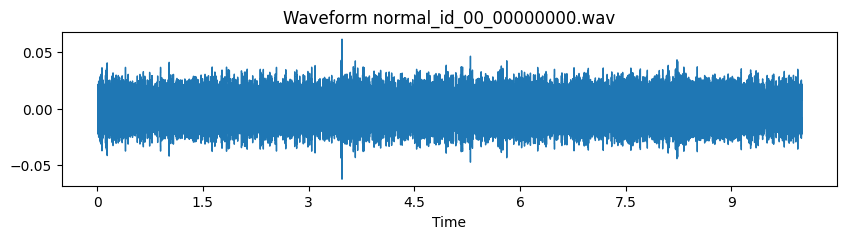

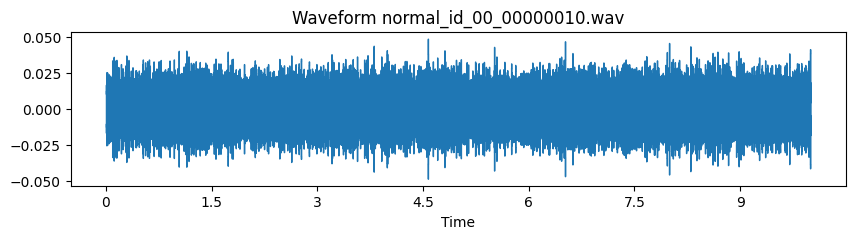

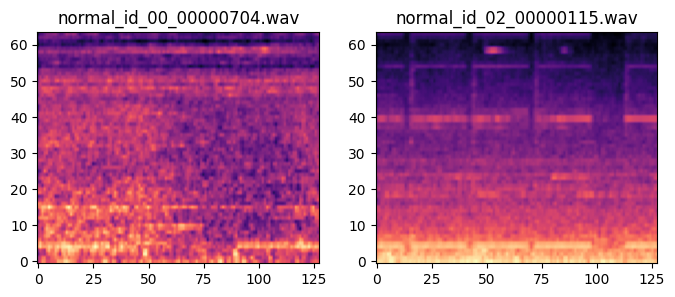

CNN Autoencoder model initialized on cuda.
Starting training for 100 epochs...


Epoch  1 avg_loss=0.017556


Epoch  2 avg_loss=0.006739


Epoch  3 avg_loss=0.004308


Epoch  4 avg_loss=0.003634


Epoch  5 avg_loss=0.003774


Epoch  6 avg_loss=0.002907


Epoch  7 avg_loss=0.002787


Epoch  8 avg_loss=0.002393


Epoch  9 avg_loss=0.003759


Epoch 10 avg_loss=0.002570


Epoch 11 avg_loss=0.002327


Epoch 12 avg_loss=0.002300


Epoch 13 avg_loss=0.003520


Epoch 14 avg_loss=0.002472


Epoch 15 avg_loss=0.002198


Epoch 16 avg_loss=0.002126


Epoch 17 avg_loss=0.002668


Epoch 18 avg_loss=0.002722


Epoch 19 avg_loss=0.002162


Epoch 20 avg_loss=0.001992


Epoch 21 avg_loss=0.002205


Epoch 22 avg_loss=0.002850


Epoch 23 avg_loss=0.002192


Epoch 24 avg_loss=0.001931


Epoch 25 avg_loss=0.001828


Epoch 26 avg_loss=0.001862


Epoch 27 avg_loss=0.001790


Epoch 28 avg_loss=0.001734


Epoch 29 avg_loss=0.001685


Epoch 30 avg_loss=0.001616


Epoch 31 avg_loss=0.001589


Epoch 32 avg_loss=0.001682


Epoch 33 avg_loss=0.001577


Epoch 34 avg_loss=0.001673


Epoch 35 avg_loss=0.001713


Epoch 36 avg_loss=0.001543


Epoch 37 avg_loss=0.001536


Epoch 38 avg_loss=0.001512


Epoch 39 avg_loss=0.001541


Epoch 40 avg_loss=0.001495


Epoch 41 avg_loss=0.001508


Epoch 42 avg_loss=0.001483


Epoch 43 avg_loss=0.001415


Epoch 44 avg_loss=0.001405


Epoch 45 avg_loss=0.001374


Epoch 46 avg_loss=0.001422


Epoch 47 avg_loss=0.002851


Epoch 48 avg_loss=0.001933


Epoch 49 avg_loss=0.001764


Epoch 50 avg_loss=0.001640


Epoch 51 avg_loss=0.001613


Epoch 52 avg_loss=0.001524


Epoch 53 avg_loss=0.001572


Epoch 54 avg_loss=0.001460


Epoch 55 avg_loss=0.001429


Epoch 56 avg_loss=0.001409


Epoch 57 avg_loss=0.001488


Epoch 58 avg_loss=0.001527


Epoch 59 avg_loss=0.001595


Epoch 60 avg_loss=0.001492


Epoch 61 avg_loss=0.001424


Epoch 62 avg_loss=0.001381


Epoch 63 avg_loss=0.001376


Epoch 64 avg_loss=0.001299


Epoch 65 avg_loss=0.001371


Epoch 66 avg_loss=0.001334


Epoch 67 avg_loss=0.001369


Epoch 68 avg_loss=0.001403


Epoch 69 avg_loss=0.001303


Epoch 70 avg_loss=0.001256


Epoch 71 avg_loss=0.001239


Epoch 72 avg_loss=0.001314


Epoch 73 avg_loss=0.001262


Epoch 74 avg_loss=0.001250


Epoch 75 avg_loss=0.001267


Epoch 76 avg_loss=0.001298


Epoch 77 avg_loss=0.001188


Epoch 78 avg_loss=0.001175


Epoch 79 avg_loss=0.001609


Epoch 80 avg_loss=0.001474


Epoch 81 avg_loss=0.001315


Epoch 82 avg_loss=0.001267


Epoch 83 avg_loss=0.001440


Epoch 84 avg_loss=0.001235


Epoch 85 avg_loss=0.001174


Epoch 86 avg_loss=0.001228


Epoch 87 avg_loss=0.001166


Epoch 88 avg_loss=0.001157


Epoch 89 avg_loss=0.001219


Epoch 90 avg_loss=0.001310


Epoch 91 avg_loss=0.001266


Epoch 92 avg_loss=0.001155


Epoch 93 avg_loss=0.001130


Epoch 94 avg_loss=0.001170


Epoch 95 avg_loss=0.001126


Epoch 96 avg_loss=0.001111


Epoch 97 avg_loss=0.001101


Epoch 98 avg_loss=0.001226


Epoch 99 avg_loss=0.001128


Epoch 100 avg_loss=0.001275


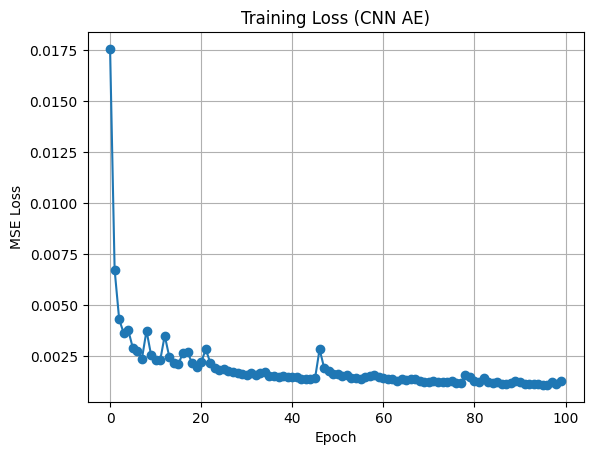

Starting testing/inference...


AUC: 0.8098


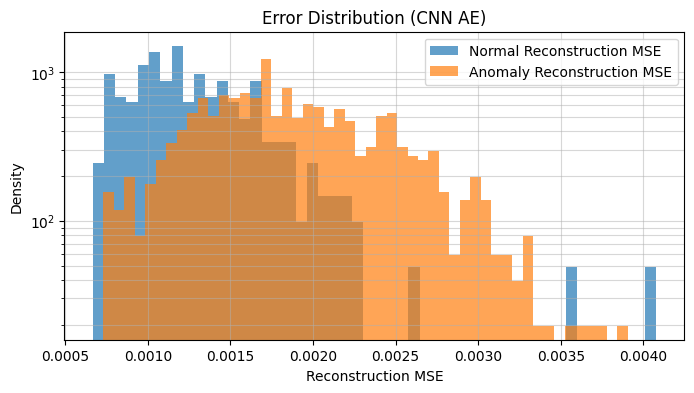

Script finished.


In [1]:
# %% [markdown]
# # Autoencoder Baseline for DCASE‑Inspired Anomalous Sound Detection
# ## (Using ResNet-50 based CNN Autoencoder)

# %%
# Install dependencies (uncomment if needed)
# !pip install torch torchvision torchaudio librosa tqdm scikit-learn

# %%
import os, glob
import numpy as np
import torch
from torch import nn
import torchaudio
import torchaudio.transforms as T
import librosa, librosa.display
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import random
import torchvision.models as models
import torchvision.transforms as tv_transforms # Renamed to avoid conflict with torchaudio.transforms

# %%
# Device setup
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', DEVICE)


# %% [markdown]
# ## DATA Examination (Assuming this part remains the same)

# %%
TRAIN_DIR = 'DATA/dev_data/dev_data/slider/train'
TEST_DIR = 'DATA/dev_data/dev_data/slider/test'
# Ensure these paths are correct for your environment
# Fallback for environments where DATA/ might not exist at top level
if not os.path.exists(TRAIN_DIR):
    print(f"Warning: {TRAIN_DIR} does not exist. Trying relative path.")
    TRAIN_DIR = os.path.join('..', 'DATA', 'dev_data', 'dev_data', 'slider', 'train')
    TEST_DIR = os.path.join('..', 'DATA', 'dev_data', 'dev_data', 'slider', 'test')
    if not os.path.exists(TRAIN_DIR): # Final check
        print(f"Error: Could not find {TRAIN_DIR}. Please check paths.")
        # Create dummy directories/files for script to run without data for demonstration
        os.makedirs(TRAIN_DIR, exist_ok=True)
        os.makedirs(TEST_DIR, exist_ok=True)
        # Create a few dummy .wav files
        # Note: This means no actual audio data will be processed if paths are wrong.
        # For a real run, ensure data paths are correct.
        if not glob.glob(os.path.join(TRAIN_DIR, '*.wav')):
            for i in range(5):
                dummy_sr = 16000
                dummy_audio = np.random.randn(dummy_sr * 1) # 1 second dummy audio
                torchaudio.save(os.path.join(TRAIN_DIR, f"normal_dummy_{i}.wav"), torch.from_numpy(dummy_audio).float().unsqueeze(0), dummy_sr)
                torchaudio.save(os.path.join(TEST_DIR, f"normal_dummy_test_{i}.wav"), torch.from_numpy(dummy_audio).float().unsqueeze(0), dummy_sr)
                torchaudio.save(os.path.join(TEST_DIR, f"anomaly_dummy_test_{i}.wav"), torch.from_numpy(dummy_audio).float().unsqueeze(0), dummy_sr)


train_files = sorted(glob.glob(os.path.join(TRAIN_DIR, '*.wav')))
test_files  = sorted(glob.glob(os.path.join(TEST_DIR,  '*.wav')))
print('Train samples:', len(train_files))
print('Test  samples:', len(test_files))
if train_files:
    print('First 3 train files:', train_files[:3])

    def get_duration(path):
        try:
            return librosa.get_duration(path=path)
        except Exception as e:
            print(f"Error loading {path}: {e}")
            return 0
    total_sec = sum(get_duration(f) for f in tqdm(train_files, desc='calc duration'))
    print(f"Total train duration: {total_sec/3600:.2f} h")

    # Plot waveform examples
    if len(train_files) > 10:
        for idx in [0, 10]:
            try:
                y, sr = librosa.load(train_files[idx], sr=None)
                plt.figure(figsize=(10,2))
                librosa.display.waveshow(y, sr=sr)
                plt.title(f"Waveform {os.path.basename(train_files[idx])}")
                plt.show()
            except Exception as e:
                print(f"Could not plot waveform for {train_files[idx]}: {e}")
else:
    print("No training files found to examine or plot.")


# %% [markdown]
# ## Audio → log‑mel conversion (Remains the same)

# %%
SAMPLE_RATE = 16000
N_MELS = 64
HOP = 512
FRAMES = 128 # This will be height of the image like input for CNN

def audio_to_logmel(path, sr=SAMPLE_RATE):
    try:
        y, _ = librosa.load(path, sr=sr)
    except Exception as e:
        print(f"Error loading audio {path}: {e}")
        # Return a dummy array in case of error to avoid crashing downstream processing
        # This should be handled more robustly in a production system
        return np.zeros((FRAMES, N_MELS), dtype=np.float32)

    mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=N_MELS, hop_length=HOP)
    logmel = librosa.power_to_db(mel)

    # Frame-wise pad/trim
    logmel = logmel.T  # [Time, Mel] -> [FRAMES, N_MELS] if Time is FRAMES
    if logmel.shape[0] < FRAMES:
        pad = FRAMES - logmel.shape[0]
        logmel = np.pad(logmel, ((0, pad), (0, 0)))
    else:
        logmel = logmel[:FRAMES]

    # Normalize
    min_val = logmel.min()
    max_val = logmel.max()
    if max_val - min_val > 1e-6:
        logmel = (logmel - min_val) / (max_val - min_val)
    else: # Avoid division by zero if spectrogram is flat (e.g. silence)
        logmel = np.zeros_like(logmel)
    return logmel


# %%
# Show spectrograms of random samples
if train_files and len(train_files) >=2 :
    fig, axes = plt.subplots(1,2, figsize=(8,3))
    # Ensure random.sample doesn't request more samples than available
    num_samples_to_show = min(2, len(train_files))
    if num_samples_to_show > 0:
        for ax, p in zip(axes, random.sample(train_files, num_samples_to_show)):
            try:
                lm = audio_to_logmel(p)
                ax.imshow(lm.T, origin='lower', aspect='auto', cmap='magma')
                ax.set_title(os.path.basename(p))
            except Exception as e:
                print(f"Could not display spectrogram for {p}: {e}")
                ax.set_title(f"Error: {os.path.basename(p)}")
        plt.show()
else:
    print("Not enough training files to show spectrograms.")


# %% [markdown]
# ## Offline preprocess to `.npy` (Remains the same logic)

# %%
PREP_DIR = 'DATA/preprocessed_cnn' # Changed to avoid conflict with original preprocessed files
RAW_DIR_BASE = 'DATA/dev_data/dev_data' # Base for raw data

# Adjust RAW_DIR if the initial paths were modified
if not os.path.exists(os.path.join(RAW_DIR_BASE, 'slider')):
     RAW_DIR_BASE = os.path.join('..', 'DATA', 'dev_data', 'dev_data')

RAW_DIR = os.path.join(RAW_DIR_BASE, 'slider')


os.makedirs(f'{PREP_DIR}/train', exist_ok=True)
os.makedirs(f'{PREP_DIR}/test',  exist_ok=True)

for split in ['train','test']:
    src = os.path.join(RAW_DIR, split)
    dst = os.path.join(PREP_DIR, split)
    
    # Check if source directory exists
    if not os.path.isdir(src):
        print(f"Source directory {src} not found. Skipping preprocessing for {split}.")
        continue

    wav_files = glob.glob(f'{src}/*.wav')
    if not wav_files:
        print(f"No .wav files found in {src}. Skipping preprocessing for {split}.")
        continue

    for wav in tqdm(wav_files, desc=f'Prep {split}', leave=False):
        out_npy = os.path.join(dst, os.path.basename(wav).replace('.wav','.npy'))
        if os.path.exists(out_npy):
            continue
        try:
            logmel_data = audio_to_logmel(wav)
            np.save(out_npy, logmel_data)
        except Exception as e:
            print(f"Error processing or saving {wav}: {e}")


# %% [markdown]
# ## Dataset & DataLoader (Modified for CNN)

# %%
class NPYSoundDataset(Dataset):
    def __init__(self, folder):
        self.files = sorted(glob.glob(os.path.join(folder, '*.npy')))
        if not self.files:
            print(f"Warning: No .npy files found in {folder}. Dataset will be empty.")

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        arr = np.load(self.files[idx])  # Expected shape: [FRAMES, N_MELS]
        # Convert to tensor and add channel dimension: [1, FRAMES, N_MELS]
        x = torch.tensor(arr, dtype=torch.float32).unsqueeze(0)
        label = 0 if 'normal' in self.files[idx].lower() else 1
        return x, label

BATCH_SIZE = 64 # Reduced batch size for potentially larger ResNet model
train_ds_path = f'{PREP_DIR}/train'
test_ds_path = f'{PREP_DIR}/test'

# Check if preprocessed directories have files
if not os.listdir(train_ds_path):
    print(f"Warning: Preprocessed training directory {train_ds_path} is empty.")
    # Create dummy npy files if TRAIN_DIR was also dummied
    if not glob.glob(os.path.join(TRAIN_DIR, '*.wav')): # Implies dummy wavs were created
         dummy_logmel = np.random.rand(FRAMES, N_MELS).astype(np.float32)
         for i in range(5):
             np.save(os.path.join(train_ds_path, f"normal_dummy_{i}.npy"), dummy_logmel)
             np.save(os.path.join(test_ds_path, f"normal_dummy_test_{i}.npy"), dummy_logmel)
             np.save(os.path.join(test_ds_path, f"anomaly_dummy_test_{i}.npy"), dummy_logmel)


train_ds = NPYSoundDataset(train_ds_path)
test_ds  = NPYSoundDataset(test_ds_path)

if len(train_ds) > 0:
    train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
else:
    print("Train dataset is empty. DataLoader cannot be created.")
    train_dl = None

if len(test_ds) > 0:
    test_dl  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
else:
    print("Test dataset is empty. DataLoader cannot be created.")
    test_dl = None


# %% [markdown]
# ## CNN Autoencoder (ResNet-50 based)

# %%
class CNN_AE(nn.Module):
    def __init__(self, input_frames=FRAMES, input_mels=N_MELS, target_resize=(224, 224)):
        super().__init__()
        self.input_frames = input_frames
        self.input_mels = input_mels
        self.target_resize = target_resize # ResNet typical input size

        # Transformation to resize input spectrogram and ensure it's on the correct device
        self.preprocess_transform = tv_transforms.Compose([
            tv_transforms.Resize(self.target_resize, antialias=True)
        ])

        # Encoder (ResNet-50 base)
        resnet = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
        # Remove the fully connected layer and average pooling
        self.encoder_conv1 = resnet.conv1
        self.encoder_bn1 = resnet.bn1
        self.encoder_relu = resnet.relu
        self.encoder_maxpool = resnet.maxpool
        self.encoder_layer1 = resnet.layer1
        self.encoder_layer2 = resnet.layer2
        self.encoder_layer3 = resnet.layer3
        self.encoder_layer4 = resnet.layer4
        # Output of layer4 is [B, 2048, H_out, W_out]
        # If input to ResNet is 224x224, H_out, W_out = 7, 7.
        bottleneck_channels = 2048

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(bottleneck_channels, 1024, kernel_size=4, stride=2, padding=1), # B, 1024, 14, 14
            nn.ReLU(),
            nn.BatchNorm2d(1024),
            nn.ConvTranspose2d(1024, 512, kernel_size=4, stride=2, padding=1), # B, 512, 28, 28
            nn.ReLU(),
            nn.BatchNorm2d(512),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1), # B, 256, 56, 56
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1), # B, 128, 112, 112
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1), # B, 64, 224, 224
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 3, kernel_size=3, padding=1), # Output [B, 3, 224, 224]
            nn.Sigmoid() # Output in [0,1] to match normalized input spectrograms
        )

    def forward(self, x): # x is [B, 1, input_frames, input_mels] e.g. [B, 1, 128, 64]
        # Preprocess input for ResNet
        # x is already on DEVICE from DataLoader or manual move
        
        # Resize to target_resize for ResNet
        # Input x is [B, 1, H, W]
        x_resized = self.preprocess_transform(x) # [B, 1, target_resize_H, target_resize_W]

        # Replicate to 3 channels
        x_3channel_resized = x_resized.repeat(1, 3, 1, 1) # [B, 3, target_resize_H, target_resize_W]

        # Encoder
        e = self.encoder_conv1(x_3channel_resized)
        e = self.encoder_bn1(e)
        e = self.encoder_relu(e)
        e = self.encoder_maxpool(e)

        e = self.encoder_layer1(e)
        e = self.encoder_layer2(e)
        e = self.encoder_layer3(e)
        e = self.encoder_layer4(e) # Bottleneck

        # Decoder
        reconstructed_3channel_resized = self.decoder(e)

        # The loss will be calculated between reconstructed_3channel_resized
        # and the target x_3channel_resized.
        return reconstructed_3channel_resized, x_3channel_resized


model = CNN_AE(input_frames=FRAMES, input_mels=N_MELS).to(DEVICE)
print(f"CNN Autoencoder model initialized on {DEVICE}.")
# print(model) # Uncomment to see model structure

# %% [markdown]
# ## Training Loop (Adjusted for CNN AE)

# %%
opt = torch.optim.Adam(model.parameters(), lr=1e-4) # Potentially smaller LR for larger model
crit = nn.MSELoss()
EPOCHS = 100 # Reduced epochs for ResNet50; adjust based on your GPU capability
history = []

if train_dl:
    print(f"Starting training for {EPOCHS} epochs...")
    for ep in range(1, EPOCHS+1):
        model.train()
        total_loss = 0.0
        
        # Wrap train_dl with tqdm for progress bar
        batch_iterator = tqdm(train_dl, desc=f'Epoch {ep}/{EPOCHS}', leave=False)
        
        for x, _ in batch_iterator: # Labels are ignored for AE training (assuming only normal data)
            x = x.to(DEVICE) # x from loader is [B, 1, FRAMES, N_MELS]
            opt.zero_grad()
            
            reconstructed_x, target_x = model(x) # Model returns (reconstruction, target_for_loss)
            
            loss = crit(reconstructed_x, target_x)
            loss.backward()
            opt.step()
            
            total_loss += loss.item() * x.size(0)
            batch_iterator.set_postfix({'loss': loss.item()}) # Show current batch loss
            
        avg_loss = total_loss / len(train_ds)
        history.append(avg_loss)
        print(f'Epoch {ep:2d} avg_loss={avg_loss:.6f}')
else:
    print("Training cannot start as train_dl is not available.")


# %%
# Plot training loss
if history:
    plt.figure()
    plt.plot(history, marker='o')
    plt.title('Training Loss (CNN AE)')
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.grid(True)
    plt.show()
else:
    print("No training history to plot.")

# %% [markdown]
# ## Inference & AUC (Adjusted for CNN AE)

# %%
if test_dl:
    model.eval()
    scores, labels = [], []
    print("Starting testing/inference...")
    with torch.no_grad():
        for x, y in tqdm(test_dl, desc='Testing', leave=False):
            x = x.to(DEVICE) # x from loader is [B, 1, FRAMES, N_MELS]
            
            reconstructed_x, target_x = model(x) # model returns (reconstruction, target_for_loss)
            
            # Calculate error per sample in the batch
            # Error is between reconstructed_x and target_x (both [B, 3, target_H, target_W])
            err = ((reconstructed_x - target_x)**2).mean(dim=[1,2,3]).cpu().numpy() # Mean over C, H, W
            
            scores.extend(err)
            labels.extend(y.numpy())

    if labels and scores:
        try:
            auc = roc_auc_score(labels, scores)
            print(f'AUC: {auc:.4f}')
        except ValueError as e:
            print(f"Error calculating AUC: {e}. Check if labels contain both classes.")
            # This can happen if all labels are the same (e.g., only normal or only anomaly in test set)
            unique_labels = np.unique(labels)
            print(f"Unique labels in test set: {unique_labels}")
            if len(unique_labels) < 2 :
                 print("AUC cannot be computed with only one class present in the test data labels.")

    else:
        print("No scores or labels generated from testing.")
        auc = None

    # %%
    # Error distribution
    if labels and scores:
        normal_err = [s for s,l in zip(scores,labels) if l==0]
        anom_err   = [s for s,l in zip(scores,labels) if l==1]

        if not normal_err: print("Warning: No normal samples found in test results for error distribution plot.")
        if not anom_err: print("Warning: No anomalous samples found in test results for error distribution plot.")

        plt.figure(figsize=(8,4))
        plt.hist(normal_err, bins=50, alpha=0.7, label='Normal Reconstruction MSE', density=True)
        plt.hist(anom_err,   bins=50, alpha=0.7, label='Anomaly Reconstruction MSE', density=True)
        plt.xlabel('Reconstruction MSE')
        plt.ylabel('Density')
        plt.title('Error Distribution (CNN AE)')
        plt.legend()
        plt.semilogy() # Using log scale for y-axis can be helpful
        plt.grid(True, which="both", ls="-", alpha=0.5)
        plt.show()
    else:
        print("No data to plot error distribution.")
else:
    print("Testing cannot start as test_dl is not available.")

# %%
print("Script finished.")

In [2]:
import os
import glob

def count_audio_files(test_folder_path: str) -> tuple[int, int, int]:
    """
    Counts normal and anomalous .wav files in a specified folder.

    Args:
        test_folder_path (str): The path to the folder containing test audio files.

    Returns:
        tuple[int, int, int]: A tuple containing (total_files, normal_count, anomaly_count).
    """
    normal_count = 0
    anomaly_count = 0
    
    # Construct the search pattern for .wav files
    search_pattern = os.path.join(test_folder_path, '*.wav')
    test_files = glob.glob(search_pattern)
    
    total_files = len(test_files)
    
    if not test_files:
        print(f"No .wav files found in '{test_folder_path}'.")
        return 0, 0, 0
        
    for file_path in test_files:
        filename = os.path.basename(file_path).lower() # Get filename and convert to lowercase
        if 'normal' in filename:
            normal_count += 1
        elif 'anomaly' in filename: # you might have 'anomalous' or other variations
            anomaly_count += 1
            
    return total_files, normal_count, anomaly_count

# --- Configuration ---
# Adjust this path to your actual test folder
TEST_AUDIO_FOLDER = 'DATA/dev_data/dev_data/slider/test' 
# Or use the PREP_DIR from your previous script if counting .npy files
# TEST_AUDIO_FOLDER = 'DATA/preprocessed_cnn/test' # if counting .npy files

if __name__ == "__main__":
    print(f"🔍 Counting audio files in: '{TEST_AUDIO_FOLDER}'")

    # Check if the directory exists
    if not os.path.isdir(TEST_AUDIO_FOLDER):
        print(f"❌ Error: Directory not found: '{TEST_AUDIO_FOLDER}'")
        print("Please ensure the TEST_AUDIO_FOLDER path is correct.")
    else:
        total, normal, anomaly = count_audio_files(TEST_AUDIO_FOLDER)
        
        print(f"\n--- Results ---")
        print(f"Total .wav files found: {total}")
        print(f"🔊 Normal audio files: {normal}")
        print(f"⚠️ Anomalous audio files: {anomaly}")
        
        unknown_count = total - (normal + anomaly)
        if unknown_count > 0:
            print(f"❓ Unknown (not labeled 'normal' or 'anomaly' in filename): {unknown_count}")

🔍 Counting audio files in: 'DATA/dev_data/dev_data/slider/test'

--- Results ---
Total .wav files found: 1101
🔊 Normal audio files: 300
⚠️ Anomalous audio files: 801


In [2]:
import os
import glob
import librosa # For getting audio duration
import numpy as np

def analyze_audio_durations(folder_path: str) -> dict:
    """
    Analyzes .wav audio files in a specified folder to find count,
    min, max, and average durations.

    Args:
        folder_path (str): The path to the folder containing audio files.

    Returns:
        dict: A dictionary containing 'count', 'min_duration', 
              'max_duration', and 'avg_duration'. Returns None for durations
              if no files are found or an error occurs.
    """
    search_pattern = os.path.join(folder_path, '*.wav')
    audio_files = glob.glob(search_pattern)
    
    count = len(audio_files)
    
    if count == 0:
        print(f"No .wav files found in '{folder_path}'.")
        return {
            'count': 0,
            'min_duration': None,
            'max_duration': None,
            'avg_duration': None,
            'total_duration_minutes': 0
        }
        
    durations = []
    for file_path in audio_files:
        try:
            duration = librosa.get_duration(path=file_path)
            durations.append(duration)
        except Exception as e:
            print(f"Could not process file {file_path}: {e}")
            
    if not durations: # If all files failed to process
        return {
            'count': count, # Still report original count of .wav files found
            'min_duration': None,
            'max_duration': None,
            'avg_duration': None,
            'total_duration_minutes': 0
        }

    min_duration = np.min(durations)
    max_duration = np.max(durations)
    avg_duration = np.mean(durations)
    total_duration_seconds = np.sum(durations)
    total_duration_minutes = total_duration_seconds / 60
    
    return {
        'count': count,
        'min_duration': min_duration,
        'max_duration': max_duration,
        'avg_duration': avg_duration,
        'total_duration_minutes': total_duration_minutes
    }

# --- Configuration ---
# Adjust these paths to your actual train and test audio folders
TRAIN_AUDIO_FOLDER = 'DATA/dev_data/dev_data/slider/train'
TEST_AUDIO_FOLDER = 'DATA/dev_data/dev_data/slider/test'

if __name__ == "__main__":
    folders_to_analyze = {
        "Train Folder": TRAIN_AUDIO_FOLDER,
        "Test Folder": TEST_AUDIO_FOLDER
    }
    
    print("📊 Analyzing Audio File Durations...\n")
    
    for folder_name, folder_path in folders_to_analyze.items():
        print(f"--- Analyzing {folder_name} ({folder_path}) ---")
        if not os.path.isdir(folder_path):
            print(f"❌ Error: Directory not found: '{folder_path}'\n")
            continue
            
        results = analyze_audio_durations(folder_path)
        
        print(f"Total .wav files found: {results['count']}")
        if results['count'] > 0 and results['min_duration'] is not None:
            print(f"Minimum audio duration: {results['min_duration']:.2f} seconds")
            print(f"Maximum audio duration: {results['max_duration']:.2f} seconds")
            print(f"Average audio duration: {results['avg_duration']:.2f} seconds")
            print(f"Total audio duration: {results['total_duration_minutes']:.2f} minutes")
        print("-" * 30 + "\n")

📊 Analyzing Audio File Durations...

--- Analyzing Train Folder (DATA/dev_data/dev_data/slider/train) ---
Total .wav files found: 2370
Minimum audio duration: 10.00 seconds
Maximum audio duration: 10.00 seconds
Average audio duration: 10.00 seconds
Total audio duration: 395.00 minutes
------------------------------

--- Analyzing Test Folder (DATA/dev_data/dev_data/slider/test) ---
Total .wav files found: 1101
Minimum audio duration: 10.00 seconds
Maximum audio duration: 10.00 seconds
Average audio duration: 10.00 seconds
Total audio duration: 183.50 minutes
------------------------------

